In [2]:

# Importamos la librerias que vamos a utilzar en la práctica
import cv2
import os
import math
import numpy as np

from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join


In [3]:

# Creamos tres listas en las que vamos a guardar las matrices de los ultrasonidos. 

prostatas = []
halos = []
fondos = []

mypath = (os.getcwd() + r'/imagenes/')

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Buscamos entre las imagenes las que sean de prostata, halo o fondo y se asignan a
# la lista de imagenes a las que corresponden 

for file in onlyfiles:
    if "prost" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        prostatas.append(temp)
    elif "halo" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        halos.append(temp)
    elif "fondo" in file:
        img = cv2.imread(mypath + file,0)
        temp = gaussian_3 = cv2.GaussianBlur(img, (9,9), 5.0)
        fondos.append(temp)

In [4]:

def getMedian(lista):
    media_imagenes = 0
    media_x =0
    media_y =0
    vect_res = []
    for imagen in lista:
        alto = imagen.shape[0]
        largo = imagen.shape[1]
        vectores_imagen = []
        sumx = 0
        sumy = 0
        suma = 0
        cont = 0
        for i in range(alto):
            
            for j in range(largo):
                if imagen[i][j] > 0:
                    vec = []
                    sumx += i
                    sumy += j
                    suma += imagen[i][j]
                    vec.append(imagen[i][j])
                    vec.append(i)
                    vec.append(j)
                    vectores_imagen.append(vec)
                    
                    cont += 1
        
        media_y += sumy/cont
        media_x += sumx/cont
        media_imagenes += suma/cont
       
        
        vectores_parte.append(vectores_imagen)
        
    vec_medio =[media_x/len(lista),media_y/len(lista),media_imagenes/len(lista)]
    media.append(vec_medio)
 

In [5]:
media = []
vectores_parte = []

# Obtenemos la media de los grupos de imagenes. 
getMedian(prostatas)
getMedian(halos)
getMedian(fondos)


In [6]:

print("Media de Prostata: {0}\nMedia de Halo: {1}\nMedia de Fondo: {2}".format(media[0],media[1],media[2]))

Media de Prostata: [270.9038795960073, 231.34482454920877, 74.596048737143789]
Media de Halo: [268.514435679373, 250.80663728256386, 110.49765573275398]
Media de Fondo: [196.44478756615277, 258.23178558042434, 46.004277306619137]


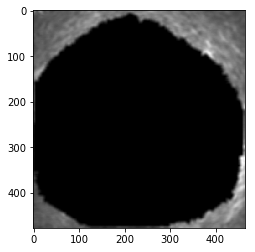

In [7]:
plt.imshow(fondos[2], cmap='gray')
plt.show()

In [8]:
prostata_list = []

for i in range(3):
    for vector in vectores_parte[i]:
        prostata_list.append(vector)

In [9]:
print("Covarianza Prostata")
cov_pros = np.cov(prostata_list, rowvar=False)
cov_pros

Covarianza Prostata


array([[  3208.52248546,    165.93114548,    842.24551492],
       [   165.93114548,  15415.07819971,    236.10465767],
       [   842.24551492,    236.10465767,  15420.59584376]])

In [10]:
halo_list = []

for i in range(3,6):
    for value in vectores_parte[i]:
        halo_list.append(value)

In [11]:
print("Covarianza Halo")
cov_halo = np.cov(halo_list, rowvar=False)
cov_halo

Covarianza Halo


array([[  2641.67156584,    206.48822135,    560.21014987],
       [   206.48822135,  25385.02254394,   1990.72072497],
       [   560.21014987,   1990.72072497,  23984.64307691]])

In [12]:

fondo_list = []

for i in range(6,9):
    for value in vectores_parte[i]:
        fondo_list.append(value)

In [13]:

print("Covarianza Fondo")
cov_fondo = np.cov(fondo_list, rowvar=False)
cov_fondo

Covarianza Fondo


array([[   463.47726764,    106.95255159,    407.98453949],
       [   106.95255159,  29937.61629339,   -695.53287608],
       [   407.98453949,   -695.53287608,  27517.86297231]])

In [14]:
logetP = (1/2)*math.log(np.linalg.det(cov_pros))
logetH = (1/2)*math.log(np.linalg.det(cov_halo))
logetF = (1/2)*math.log(np.linalg.det(cov_fondo))

In [15]:

invcovP = np.linalg.inv(cov_pros)
invcovH = np.linalg.inv(cov_halo)
invcovF = np.linalg.inv(cov_fondo)

In [16]:
prostatas_array = []
halos_array = []
fondos_array = []

for img in prostatas:
    for filas in img:
        for pixel in filas:
            prostatas_array.append(pixel)
        
for img in halos:
    for filas in img:
        for pixel in filas:
            halos_array.append(pixel)

for img in fondos:
    for filas in img:
        for pixel in filas:
            fondos_array.append(pixel)

In [17]:
probP = np.count_nonzero(prostatas_array)/len(prostatas_array)
probH = np.count_nonzero(halos_array)/len(halos_array)
probF = np.count_nonzero(fondos_array)/len(fondos_array)

In [18]:
import numpy as np
print(probF)
print(probH)
print(probP)

0.32311311513456326
0.6603488383627959
0.26754223787772213


In [20]:
def gauss(x, mean, invcov, detcov,prob):
    a = x-mean
    
    pexp = (-0.5)*np.dot(a, invcov)
    pexp = np.dot(pexp, a.T)

    gn= pexp-detcov+math.log(prob)
    
#    gn = (1/(math.sqrt(2*math.pi*detcov)))*math.pow(math.e, pexp)
    
    return gn

def fit_tranform(imagen):
    imagen[15:460][86:531]
    nuevo=[]
    
    imagen_res = np.zeros((imagen.shape))
    mnP = np.array([media[0]])
    mnH = np.array([media[1]])
    mnF = np.array([media[2]])
    
    alto = imagen.shape[0]
    largo = imagen.shape[1]
    for i in range(alto):
        for j in range(largo):
            vector=np.array([[i,j,imagen[i][j]]])
           ### vector_p = np.array([[i,j,0]])
            
            #######  escala de grises                                     distancias 
            YP = gauss(vector, mnP, invcovP, logetP,probP)#*probP*gauss(vector_p, mnP, invcovP, logetP)
            YH = gauss(vector, mnH, invcovH, logetH,probH)#*probH*gauss(vector_p, mnH, invcovH, logetH)
            YF = gauss(vector, mnF, invcovF, logetF,probF)#*probF*gauss(vector_p, mnF, invcovF, logetF)
            
            
            if(YP>YH):
                if(YP>YF):
                    imagen_res[i][j] =250
                    #print("Prostata")
            elif YH>YF:
                imagen_res[i][j] = 130
                #print("Halo")
            else:
                imagen_res[i][j]=0
                #print("Fondo")

    plt.imshow(imagen_res,cmap='gray')
    plt.show()
#             YP = -(1/2) * (np.array([i - j for i, j in zip(vector, media[0])])[np.newaxis]).T * invcovP * (np.array([i - j for i, j in zip(vector, media[0])])[np.newaxis]) - logetP + np.log(probP)
#             YH = -(1/2) * (np.array([i - j for i, j in zip(vector, media[1])])[np.newaxis]).T * invcovH * (np.array([i - j for i, j in zip(vector, media[1])])[np.newaxis]) - logetP + np.log(probH)
#             YF = -(1/2) * (np.array([i - j for i, j in zip(vector, media[2])])[np.newaxis]).T * invcovF * (np.array([i - j for i, j in zip(vector, media[2])])[np.newaxis]) - logetP + np.log(probF)
            
         

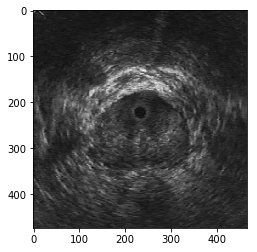

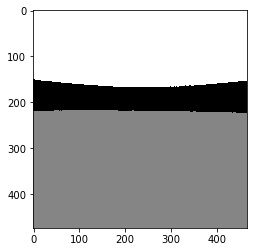

In [21]:
imagen = cv2.imread(mypath + 'U3-15-03.BMP',0)
imagen[15:460][86:531]
plt.imshow(imagen, cmap='gray')
plt.show()

fit_tranform(imagen)

In [19]:
media[0][0] = 220
media[0][1] = 250



In [ ]:
media[0]